In [71]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=sns.load_dataset('titanic')

In [105]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [11]:
data.shape

(891, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
# Problem 1 : Plot a Heatmap on the correlation between multiple columns

In [53]:
x=data.pivot_table(index=['pclass','embarked'], columns='alive', values='survived', aggfunc='count')
x

alive             no  yes
pclass embarked          
1      C          26   59
       Q           1    1
       S          53   74
2      C           8    9
       Q           1    2
       S          88   76
3      C          41   25
       Q          45   27
       S         286   67

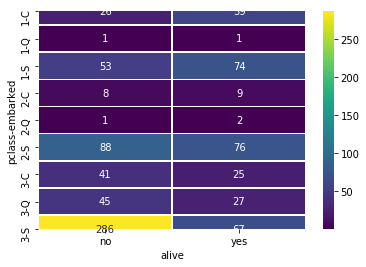

In [52]:
sns.heatmap(x,linewidths=0.5,annot=True,fmt='d',cmap='viridis')

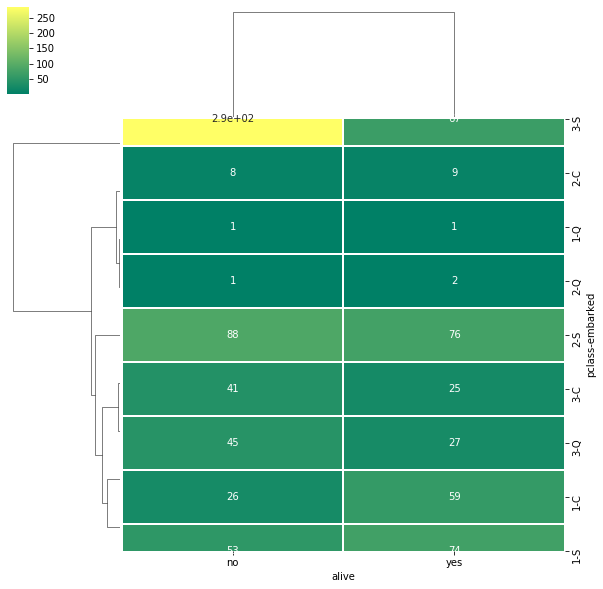

In [102]:
sns.clustermap(x,linewidths=1,annot=True,cmap='summer')

In [57]:
y=data.pivot_table(index=['class'], columns='alive', values='survived', aggfunc='count')
y

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


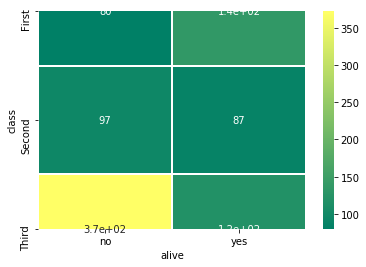

In [103]:
sns.heatmap(y,linewidths=1,annot=True,cmap='summer')

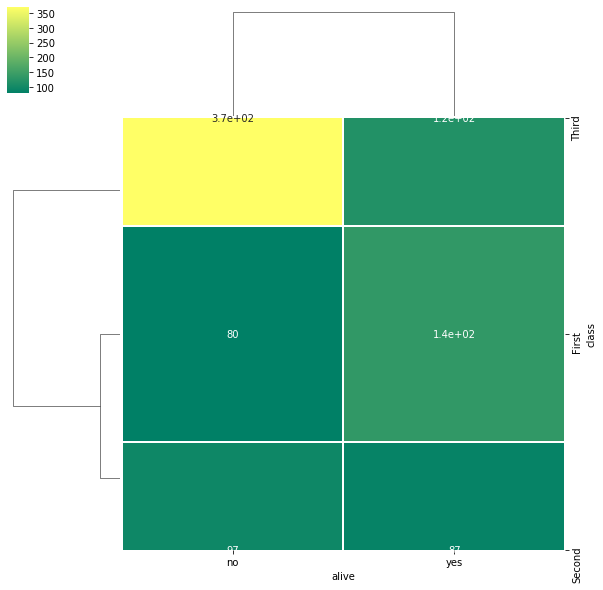

In [104]:
sns.clustermap(y,linewidths=1,annot=True,cmap='summer')

In [106]:
z=data.pivot_table(index=['age'], columns=['who','alive'], values='survived', aggfunc='count')
z

who   child       man      woman    
alive    no  yes   no  yes    no yes
age                                 
0.42    NaN  1.0  NaN  NaN   NaN NaN
0.67    NaN  1.0  NaN  NaN   NaN NaN
0.75    NaN  2.0  NaN  NaN   NaN NaN
0.83    NaN  2.0  NaN  NaN   NaN NaN
0.92    NaN  1.0  NaN  NaN   NaN NaN
...     ...  ...  ...  ...   ...  ..
70.00   NaN  NaN  2.0  NaN   NaN NaN
70.50   NaN  NaN  1.0  NaN   NaN NaN
71.00   NaN  NaN  2.0  NaN   NaN NaN
74.00   NaN  NaN  1.0  NaN   NaN NaN
80.00   NaN  NaN  NaN  1.0   NaN NaN

[88 rows x 6 columns]

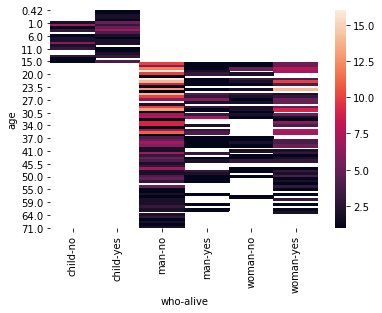

In [107]:
sns.heatmap(z)

In [5]:
# Problem 2 : Plot the distribution of age column using a Boxplot on the basis of sex column

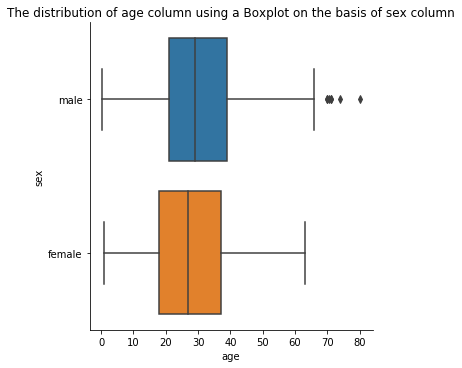

In [125]:
sns.catplot(x='age',y='sex',kind='box',data=data)
plt.title('The distribution of age column using a Boxplot on the basis of sex column')
plt.show()

In [6]:
# Problem 3 : Plot the distribution of age using a ViolinPlot on the basis of both Pclass and Sex column

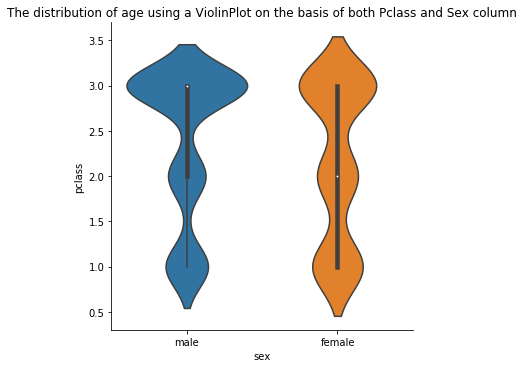

In [124]:
sns.catplot(x='sex',y='pclass',kind='violin',data=data,split=True)
plt.title('The distribution of age using a ViolinPlot on the basis of both Pclass and Sex column')
plt.show()

In [114]:
# Problem 4 : Plot the count of Survivors and Non-Survivors

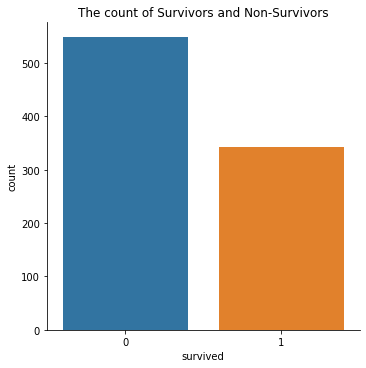

In [123]:
sns.catplot(x='survived',kind='count',data=data)
plt.title('The count of Survivors and Non-Survivors')
plt.show()

In [8]:
# Problem 5: Plot the count of survivors as well as non-survivors on the basis of Pclass

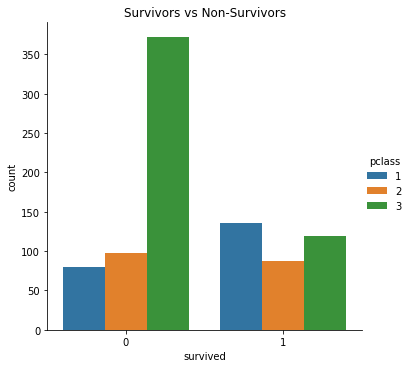

In [180]:
sns.catplot(x='survived',kind='count',hue='pclass',data=data)
plt.title('Survivors vs Non-Survivors')
plt.show()

In [9]:
# Problem 6: Plot a scatterplot between age and fare column on the basis of both Pclass and Sex column

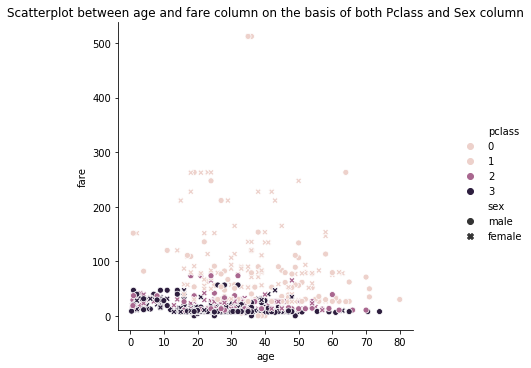

In [172]:
sns.relplot(x='age',y='fare',kind='scatter',hue='pclass',style='sex',data=data,sizes=(55,100))
plt.title('Scatterplot between age and fare column on the basis of both Pclass and Sex column')
plt.show()